In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
import camprofiler as cp

In [3]:
# Initiate Cam object with 3600 sample points
SIZE = 3600
cam = cp.Cam(size=3600)

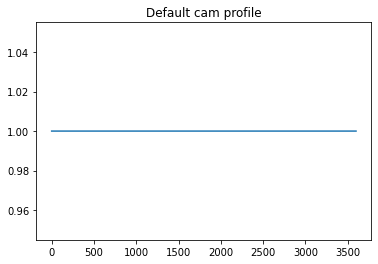

In [4]:
plt.plot(cam.profile)
plt.title("Default cam profile")
plt.show()

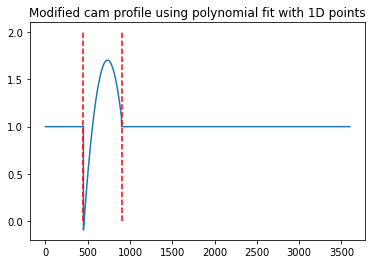

In [5]:
# Now we apply a new profile in the segment from 45 to 90 degrees
# We apply a polynomial fitted for (0,1), (1,1), (2,2), (3,1) with degree 2
new_profile = np.array([0, 1, 2, 1])
cam.fit_profile_polynomial_with_points(new_profile, start=45, end=90, degree=2)
plt.plot(cam.profile)
plt.title("Modified cam profile using polynomial fit with 1D points")
plt.vlines(x=45/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=90/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

c:\Users\jiyug\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


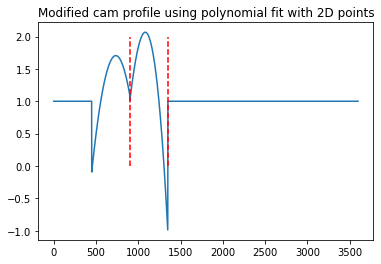

In [6]:
# Now we apply a new profile in the segment from 90 to 135 degrees. 
# We apply a polynomial fitted for (2,1), (3,-1), (8,1) with degree 3
new_profile = np.array([[2,1], [3,2], [4,-1]])
cam.fit_profile_polynomial_with_points(new_profile, start=90, end=135, degree=3)
plt.plot(cam.profile)
plt.title("Modified cam profile using polynomial fit with 2D points")
plt.vlines(x=90/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=135/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

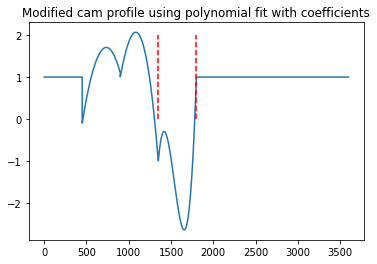

In [7]:
# Now we apply a new profile in the segment from 135 to 180 degrees.
# We apply the curve y = 4x^3 + 2x^2 - 3x - 2 with x from -1 to 1
coefficients = np.array([-2, -3, 2, 4]) 
cam.fit_profile_polynomial_with_coefficients(coefficients, cam_start=135, cam_end=180, x_start=-1, x_end=1)
plt.plot(cam.profile)
plt.title("Modified cam profile using polynomial fit with coefficients")
plt.vlines(x=135/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=180/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

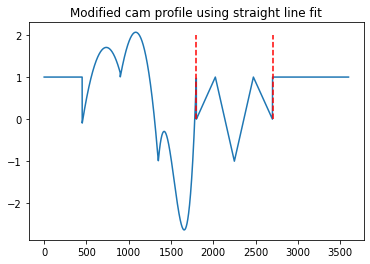

In [8]:
# Now we apply a new profile in the segment from 180 to 270 degrees.
# We apply a curve with straight segments that fits through
# (0,0), (1,1), (2,-1), (3,1), (4,0)
new_profile = np.array([0, 1, -1, 1, 0])
cam.fit_profile_with_straight_lines(new_profile, start=180, end=270)
plt.plot(cam.profile)
plt.title("Modified cam profile using straight line fit")
plt.vlines(x=180/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=270/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

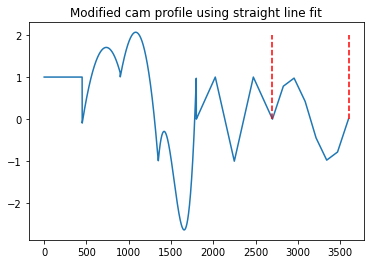

In [9]:
# Now we apply a new profile in the segment froim 270 to 360 degrees.
# We apply a sine curve with 8 straight segments
n = 8
x = sp.symbols("x")
equation = sp.sin(x)
t = np.linspace(start=0, stop=2*np.pi, num=n)
y = np.zeros((n))
for i in range(n):
    y[i] = equation.subs(x, t[i])
new_profile = np.array([np.arange(n), y]).transpose()
cam.fit_profile_with_straight_lines(new_profile, start=270, end=360)
plt.plot(cam.profile)
plt.title("Modified cam profile using straight line fit")
plt.vlines(x=270/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=360/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

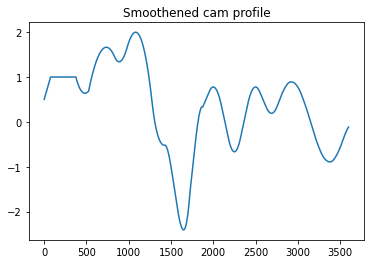

In [10]:
# Now we smoothen the curve with rolling average
cam.rolling_average_smoothen(kernel_size_in_degrees=15)
plt.plot(cam.profile)
plt.title("Smoothened cam profile")
plt.show()